In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from load_data import load_data

In [2]:
data = load_data("bianconi-barabasi_10000_5").fillna(method="ffill")

Loading dataset: Completed!


In [3]:
def offset_at_peak(df):
    all_series = {col : df[col] for col in df}
    for _,series in all_series.items():
        series.index = series.index - series.index[np.argmax(series)]
    return pd.DataFrame.from_dict(all_series)

In [4]:
df = data.xs(("none",)*3, level=(0,1,2)).xs("I", axis=1, level="compartment").fillna(method="ffill")

In [5]:
df

run,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
t,,,,,,,,,,,,,,,,,,,,,
0.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.125,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.250,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.375,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.apply(np.sort, axis=1, result_type="broadcast").mean(axis=1)

t
0.000      1.00
0.125      1.00
0.250      1.02
0.375      1.03
0.500      1.02
           ... 
136.250    0.01
136.375    0.01
136.500    0.01
136.625    0.01
136.750    0.00
Length: 1095, dtype: float64

In [7]:
def mean_quantiles(df, quantiles=[0.025,0.975]):
    N_samples = df.shape[1]
    sorted_df = df.apply(np.sort, axis=1, result_type="broadcast")
    result = pd.DataFrame(index=df.index)
    result["mean"] = sorted_df.mean(axis=1)    
    for q in quantiles:
        idx = N_samples * q - 1
        if idx % 1 == 0:
            result[q] = sorted_df[idx]
        else:
            result[q] = (sorted_df[np.floor(idx)] + sorted_df[np.ceil(idx)]) / 2
    return result

In [8]:
df

run,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
t,,,,,,,,,,,,,,,,,,,,,
0.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.125,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.250,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.375,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
136.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.apply(np.unique, axis=1)

t
0.000                [1.0]
0.125                [1.0]
0.250           [1.0, 2.0]
0.375           [1.0, 2.0]
0.500      [0.0, 1.0, 2.0]
                ...       
136.250         [0.0, 1.0]
136.375         [0.0, 1.0]
136.500         [0.0, 1.0]
136.625         [0.0, 1.0]
136.750              [0.0]
Length: 1095, dtype: object

In [10]:
mean_quantiles(df)

,mean,0.025,0.975
t,,,
0.000,1.00,1.0,1.0
0.125,1.00,1.0,1.0
0.250,1.02,1.0,1.0
0.375,1.03,1.0,1.5
0.500,1.02,0.5,2.0
...,...,...,...
136.250,0.01,0.0,0.0
136.375,0.01,0.0,0.0
136.500,0.01,0.0,0.0


In [11]:
pd.unique(data.reset_index(["reaction","t"]).index)

array([('none', 'none'), ('fixed', 'short'), ('fixed', 'long'),
       ('fixed', 'shortlong'), ('fixed', 'neighbours'), ('fixed', 'all'),
       ('uni', 'short'), ('uni', 'long'), ('uni', 'shortlong'),
       ('uni', 'neighbours'), ('uni', 'all'), ('asyLow', 'short'),
       ('asyLow', 'long'), ('asyLow', 'shortlong'),
       ('asyLow', 'neighbours'), ('asyLow', 'all'), ('asyHigh', 'short'),
       ('asyHigh', 'long'), ('asyHigh', 'shortlong'),
       ('asyHigh', 'neighbours'), ('asyHigh', 'all'), ('bi', 'short'),
       ('bi', 'long'), ('bi', 'shortlong'), ('bi', 'neighbours'),
       ('bi', 'all'), ('corr', 'short'), ('corr', 'long'),
       ('corr', 'shortlong'), ('corr', 'neighbours'), ('corr', 'all'),
       ('anticorr', 'short'), ('anticorr', 'long'),
       ('anticorr', 'shortlong'), ('anticorr', 'neighbours'),
       ('anticorr', 'all')], dtype=object)

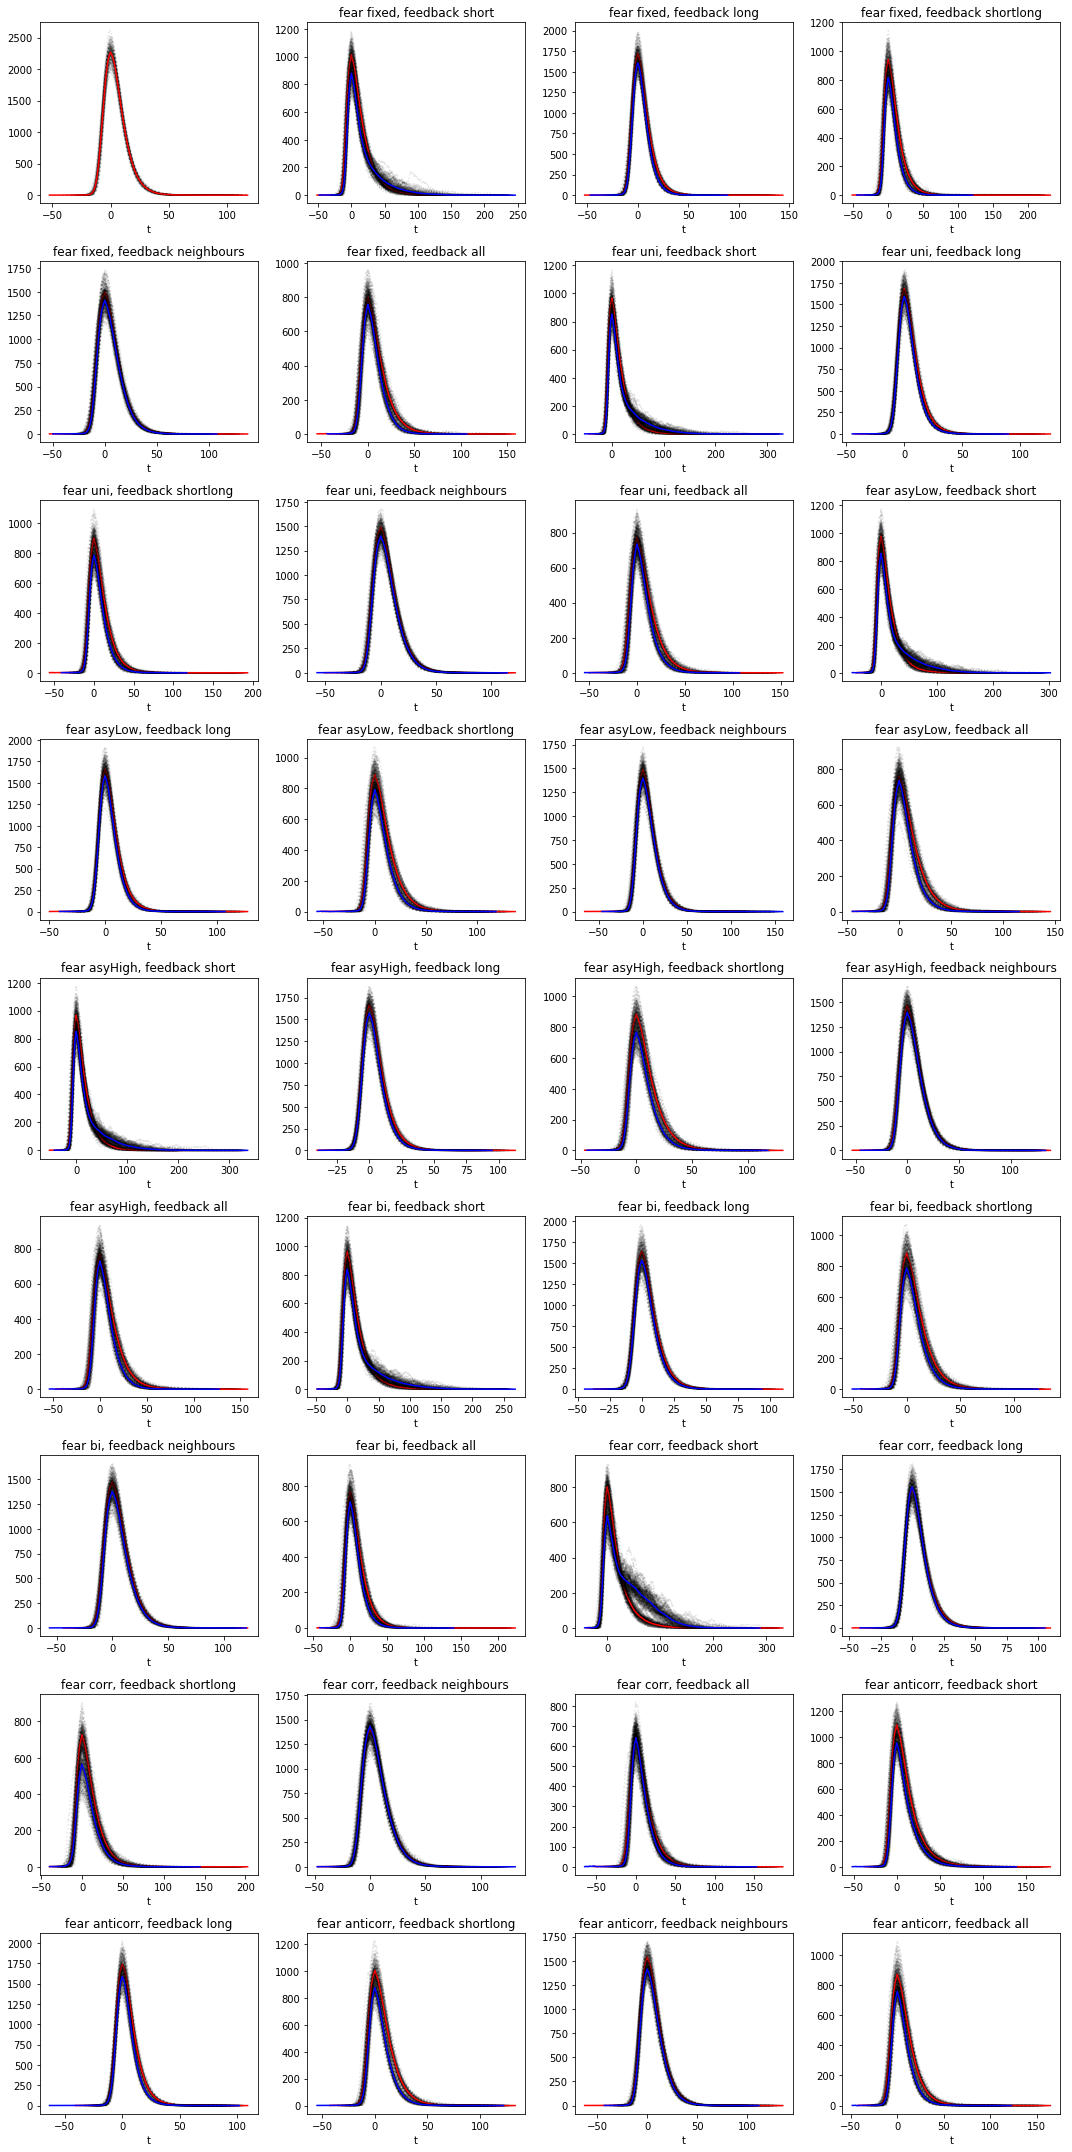

In [18]:
fig, axs = plt.subplots(9, 4, figsize=(15,30))
axs = axs.flatten()

i = 0
traslated = offset_at_peak(data.xs(("none","none","none"), level=(0,1,2)).xs("I", axis=1, level=1))
traslated.plot(linestyle=":", color="k", alpha=0.1, legend=False, ax=axs[i])
traslated.mean(axis=1).plot(color="r", ax=axs[i])
i = 1
for hyper_pars in pd.unique(data.reset_index(["reaction","t"]).index):
    if hyper_pars[0] == "none":
        continue
    axs[i].set_title(f"fear {hyper_pars[0]}, feedback {hyper_pars[1]}")
    traslated = offset_at_peak(data.xs("soften", level=0).xs(hyper_pars, level=(0,1)).xs("I", axis=1, level=1))
    traslated.plot(linestyle=":", color="k", alpha=0.1, legend=False, ax=axs[i])
    traslated.mean(axis=1).plot(color="r", label="soften", ax=axs[i])
    traslated = offset_at_peak(data.xs("cut", level=0).xs(hyper_pars, level=(0,1)).xs("I", axis=1, level=1))
    traslated.plot(linestyle=":", color="k", alpha=0.1, legend=False, ax=axs[i])
    traslated.mean(axis=1).plot(color="b", label="cut", ax=axs[i])
    i = i + 1
#for ax in axs:
#    ax.legend()
fig.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


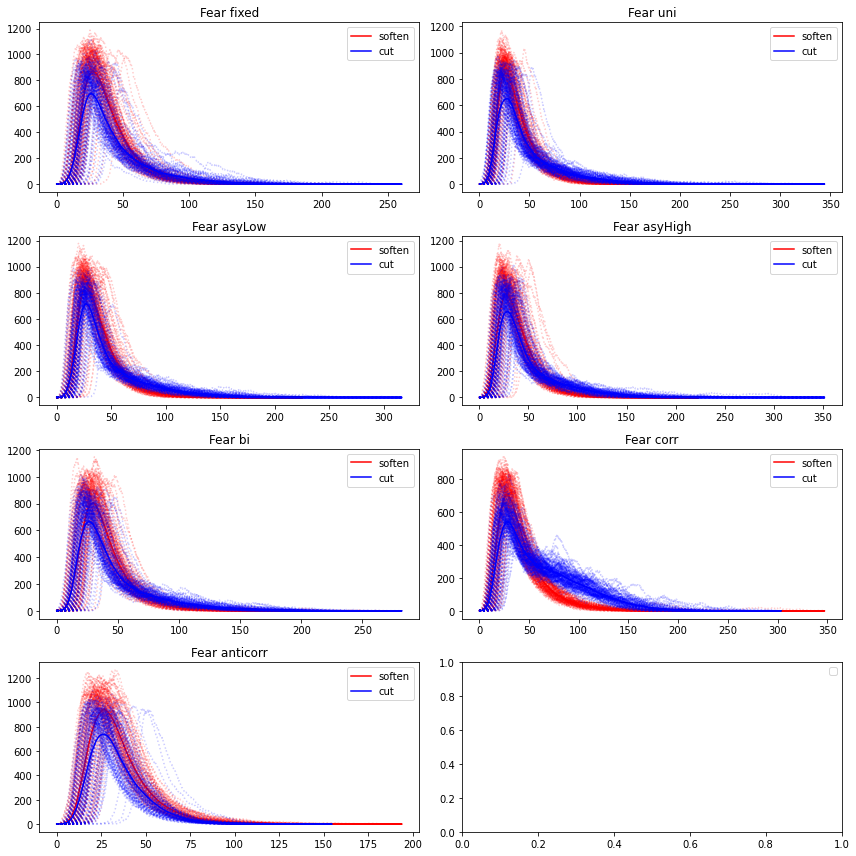

In [13]:
fig, axs = plt.subplots(4, 2, figsize=(12,12))
axs = axs.flatten()
mycolors = ["r","b"]

i = 0
for fear in pd.unique(data.index.get_level_values(1)):
    axs[i].set_title(f"Fear {fear}")
    if fear == "none":
        continue
    for j,reaction in enumerate(["soften","cut"]):
        sliced = data.xs((reaction,fear,"short"), level=(0,1,2)).xs("I", axis=1, level=1)
        axs[i].plot(sliced.mean(axis=1), color=mycolors[j], label=reaction)
        for col in sliced:
            axs[i].plot(sliced[col], color=mycolors[j], linestyle=":", alpha=0.2)
    i = i + 1

for ax in axs:
    ax.legend()
fig.tight_layout()

In [14]:
sliced.mean(axis=1)

t
0.000      1.00
0.125      1.00
0.250      0.99
0.375      0.99
0.500      1.01
           ... 
154.000    0.01
154.125    0.01
154.250    0.01
154.375    0.01
154.500    0.00
Length: 1237, dtype: float64

In [15]:
sliced

run,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
t,,,,,,,,,,,,,,,,,,,,,
0.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.125,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.250,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.375,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
154.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


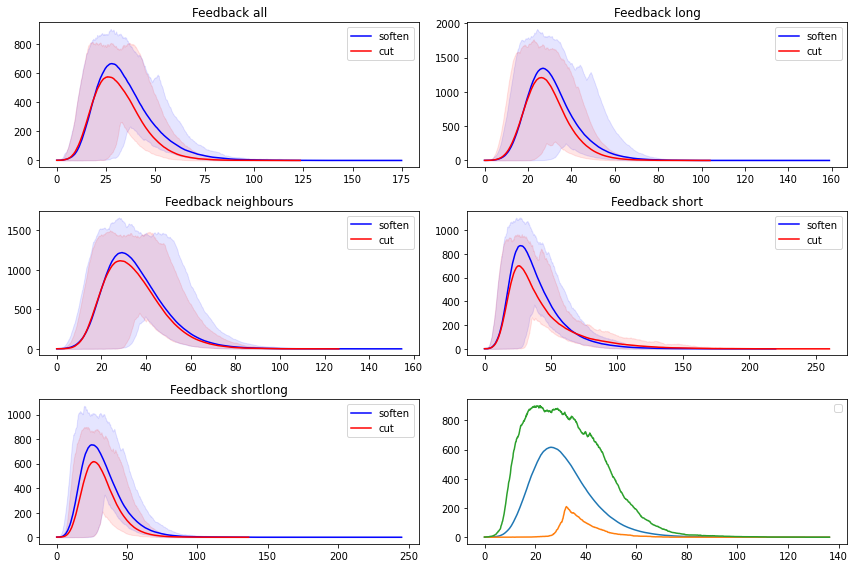

In [16]:
fig, axs = plt.subplots(3,2,figsize=(12,8))
axs = axs.flatten()
mycolors = ["b","r"]
for i,reaction in enumerate(["soften","cut"]):
    sliced = data.xs((reaction,"fixed"), level=[0,1])
    for j,feedback in enumerate(np.unique(sliced.index.get_level_values(0))):
        mean_CI = mean_quantiles(sliced.xs(feedback, level=0).xs("I", axis=1, level="compartment"))
        axs[j].set_title(f"Feedback {feedback}")
        axs[j].plot(mean_CI["mean"], color=mycolors[i], label=reaction)
        axs[j].fill_between(mean_CI.index, mean_CI[0.025], mean_CI[0.975], color=mycolors[i], alpha=0.1)
axs[5].plot(mean_quantiles(sliced.xs(feedback, level=0).xs("I", axis=1, level="compartment")))
for ax in axs:
    ax.legend()
fig.tight_layout()

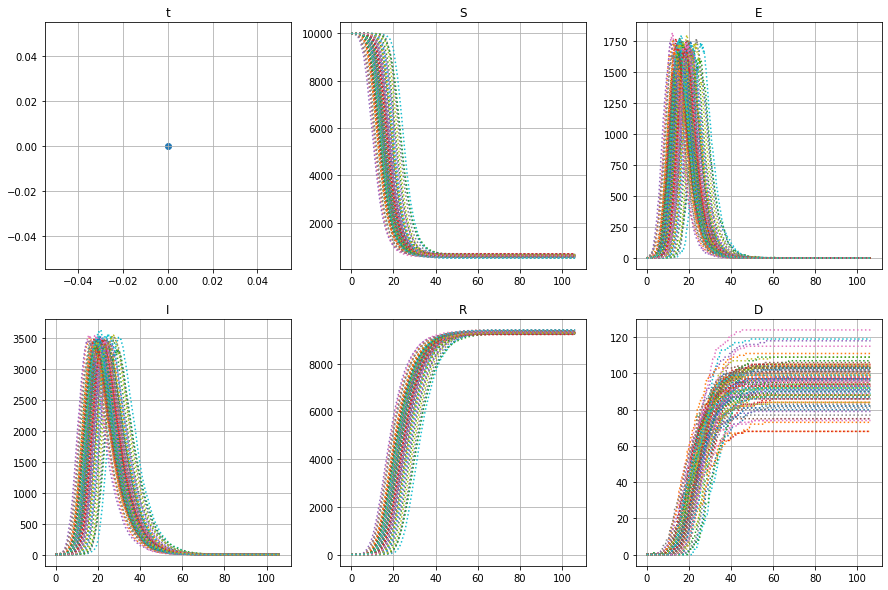

In [5]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
axs = axs.flatten()

for i in range(len(file_list)):
    axs[1].plot(data["S"][i], linestyle=":")
    axs[2].plot(data["E"][i], linestyle=":")
    axs[3].plot(data["I"][i], linestyle=":")
    axs[4].plot(data["R"][i], linestyle=":")
    axs[5].plot(data["D"][i], linestyle=":")

axs[0].scatter(0,0)
axs[0].set_title("t")

axs[1].set_title("S")
    
axs[2].set_title("E")
    
axs[3].set_title("I")
    
axs[4].set_title("R")
    
axs[5].set_title("D")
for ax in axs:
    ax.grid()

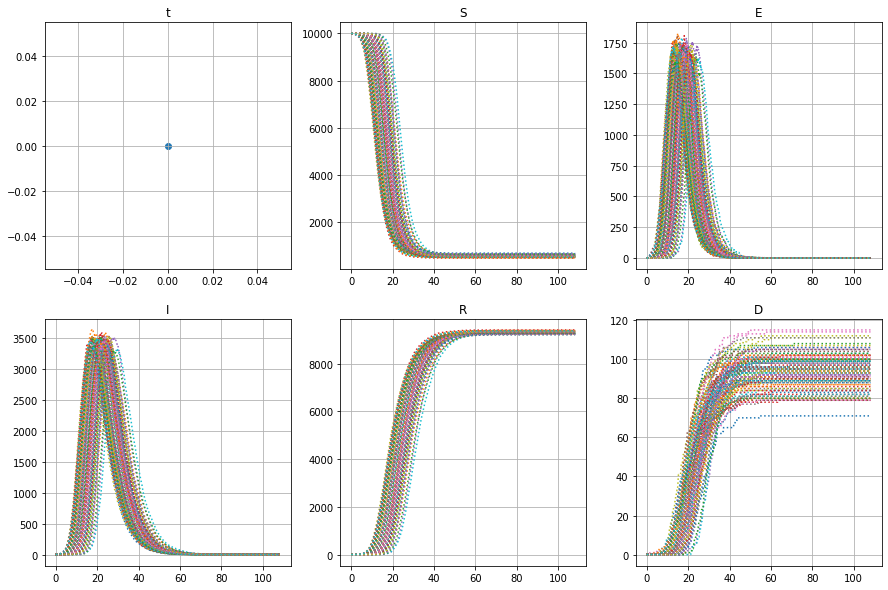

In [10]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
axs = axs.flatten()

for i in range(len(file_list)):
    axs[1].plot(data["S"][i], linestyle=":")
    axs[2].plot(data["E"][i], linestyle=":")
    axs[3].plot(data["I"][i], linestyle=":")
    axs[4].plot(data["R"][i], linestyle=":")
    axs[5].plot(data["D"][i], linestyle=":")

axs[0].scatter(0,0)
axs[0].set_title("t")

axs[1].set_title("S")
    
axs[2].set_title("E")
    
axs[3].set_title("I")
    
axs[4].set_title("R")
    
axs[5].set_title("D")
for ax in axs:
    ax.grid()